# Fashion MNIST dataset is given. Classify them

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the dataset

In [3]:
dataset = torchvision.datasets.FashionMNIST('./FashionMNIST/', train = True, transform = torchvision.transforms.ToTensor(), download = True)

In [4]:
train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*.7), len(dataset) - int(len(dataset)*.7)])

In [5]:
len(train_set)

42000

# DataLoader

In [6]:
from torch.utils.data import DataLoader

train_batch_size = 64
val_batch_size = len(val_set)

train_loader = DataLoader(train_set, batch_size = train_batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size = val_batch_size)

# Model

In [7]:
class CNNClassifier(torch.nn.Module):
    
    def __init__(self, num_classes):
        
        super(CNNClassifier, self).__init__()
        
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 8, 4),
            torch.nn.BatchNorm2d(8),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(8, 16, 4),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc = torch.nn.Linear(16*4*4, num_classes)
    
    def forward(self, x):
        
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        
        return out

In [8]:
model = CNNClassifier(num_classes=10).to(device)

# Loss

In [9]:
criterion = torch.nn.CrossEntropyLoss()

# Optimizer

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [11]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
    
    def get_avg(self):
      return self.avg

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [12]:
class AccuracyMeter(object):
    """Computes and stores the Accuracy%"""
    """Accuracy = val/count"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.count = 0
        self.accuracy = 0

    def update(self, val, n=1):
        self.val += val
        self.count += n
        self.accuracy = self.val / self.count
    
    def get_accuracy(self):
        return self.accuracy

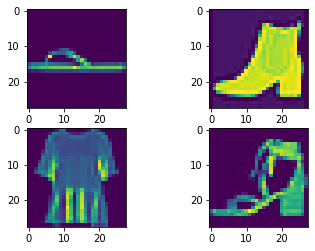

In [13]:
nrow = 2
ncol = 2

f, axarr = plt.subplots(nrow,ncol)

rand_choice = torch.randint(len(dataset), (nrow,ncol))

for i, axrow in enumerate(axarr):
    for j, ax in enumerate(axrow):
        ax.imshow(dataset[rand_choice[i][j]][0][0])

In [14]:
TRAIN_LOSSES = []
VAL_LOSSES = []
for epoch in range(50):

    train_loss = AverageMeter('Train Loss', ':.4e')
    train_accuracy = AccuracyMeter('Train Loss', ':.4e')

    val_loss = AverageMeter('Train Loss', ':.4e')
    val_accuracy = AccuracyMeter('Train Loss', ':.4e')

    for x, y in train_loader:
 
        x = x.to(device)
        y = y.to(device)
 
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.update(loss.item())

        train_accuracy.update((y_hat.argmax(dim=1)==y).sum().item(), y_hat.shape[0])

    
    with torch.no_grad():
        for x, y in val_loader:
 
            x = x.to(device)
            y = y.to(device)
 
            y_hat = model(x)
            loss = criterion(y_hat, y)

            val_loss.update(loss.item())

            val_accuracy.update((y_hat.argmax(dim=1)==y).sum().item(), y_hat.shape[0])
    
    TRAIN_LOSSES.append(train_loss.get_avg())
    VAL_LOSSES.append(val_loss.get_avg())

    print(f'Epoch {epoch}: Train Loss: {train_loss.get_avg():.3f} Val Loss {val_loss.get_avg():.3f}\
    Train Acc {train_accuracy.get_accuracy():.3f} Val Acc {val_accuracy.get_accuracy():.3f}')
        

Epoch 0: Train Loss: 0.482 Val Loss 0.403    Train Acc 0.826 Val Acc 0.847
Epoch 1: Train Loss: 0.366 Val Loss 0.343    Train Acc 0.866 Val Acc 0.877
Epoch 2: Train Loss: 0.337 Val Loss 0.343    Train Acc 0.878 Val Acc 0.874
Epoch 3: Train Loss: 0.320 Val Loss 0.427    Train Acc 0.883 Val Acc 0.847
Epoch 4: Train Loss: 0.306 Val Loss 0.338    Train Acc 0.888 Val Acc 0.877
Epoch 5: Train Loss: 0.298 Val Loss 0.336    Train Acc 0.892 Val Acc 0.881
Epoch 6: Train Loss: 0.292 Val Loss 0.322    Train Acc 0.894 Val Acc 0.884
Epoch 7: Train Loss: 0.284 Val Loss 0.320    Train Acc 0.896 Val Acc 0.886
Epoch 8: Train Loss: 0.279 Val Loss 0.325    Train Acc 0.898 Val Acc 0.887
Epoch 9: Train Loss: 0.274 Val Loss 0.340    Train Acc 0.898 Val Acc 0.877
Epoch 10: Train Loss: 0.272 Val Loss 0.317    Train Acc 0.899 Val Acc 0.890
Epoch 11: Train Loss: 0.266 Val Loss 0.327    Train Acc 0.902 Val Acc 0.884
Epoch 12: Train Loss: 0.261 Val Loss 0.331    Train Acc 0.903 Val Acc 0.883
Epoch 13: Train Loss: 

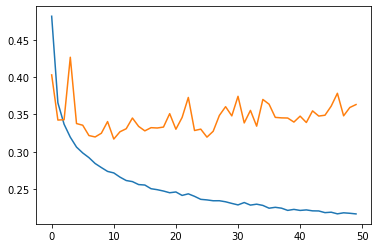

In [15]:
plt.plot(TRAIN_LOSSES)
plt.plot(VAL_LOSSES)